In [8]:
import h5py
import os
import CDOconcat
from DREAM import DREAMOutput
import matplotlib.pyplot as plt


def newest_output(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename) for basename in files if (basename.endswith('.h5') and basename.startswith('output_'))]
    return max(paths, key=os.path.getmtime)

def timeinfo(folders):
    for folder in folders:
        foldername = folder.split("/")[-2]
        fnames = []
        try:
            newest = newest_output(folder)
            numoffiles = int(newest.split("_")[-2])
        except:
            print("Finding newest output unsuccesful")

        for i in range(1, numoffiles + 1):
            fname = folder + "output_" + str(i) + "_.h5"
            fnames.append(fname)

        concat = CDOconcat.CustomConcatTimeOnly(fnames)
        print(foldername + " " + '{0:.1f}'.format(concat.timegrid_ms[-1]))

folders = ["C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc2_30/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc2_100/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc2_300/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc2_1000/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc3_30/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc3_100/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc3_300/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc3_1000/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc4_30/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc4_100/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc4_300/",
           "C:/Users/lefer/Documents/Egyetem/RE Projekt/Current/Data/ndc4_1000/"]


In [2]:
do = DREAMOutput("C:/Users/leferi/Documents/SVN/ASDEX/SPI_radiation/Data/from_Peter/dream_output.h5")

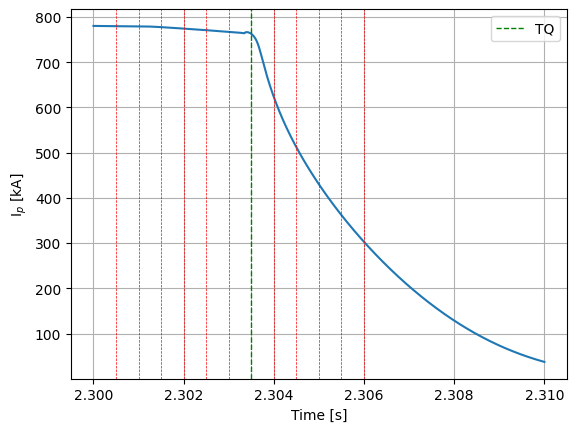

In [20]:
time = do.grid.t
I_p = do.eqsys.I_p.getData()

plt.plot(time + 2.3, I_p/1000)
plt.xlabel("Time [s]")
plt.ylabel(r"I$_p$ [kA]")
for i in range(12):
    plt.axvline(2.3005 + i * 0.0005, lw=0.5, ls="--", c="red")

plt.axvline(2.3035, lw=1, ls="--", c="green", label="TQ")
plt.legend()
plt.grid()
plt.show()

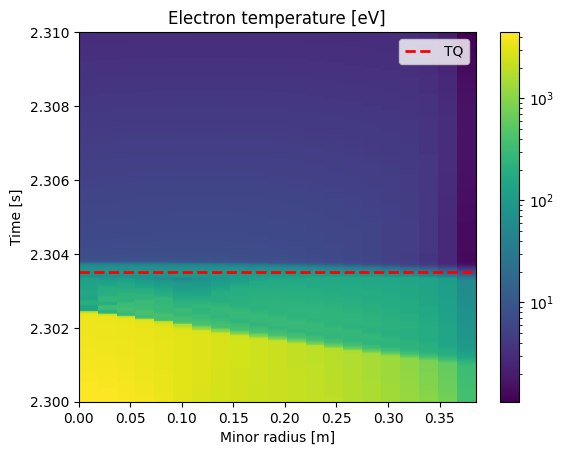

In [31]:
T_cold = do.eqsys.T_cold.getData()
Prad = do.other.fluid.Tcold_radiation.getData()
radius = do.grid.r_f

plt.pcolormesh(radius, time+2.3, T_cold[:-1, :], norm="log")
plt.xlabel("Minor radius [m]")
plt.ylabel("Time [s]")
plt.axhline(2.3035, ls="--", lw=2, c="red", label="TQ")
plt.legend()
plt.colorbar()
plt.title("Electron temperature [eV]")
plt.show()

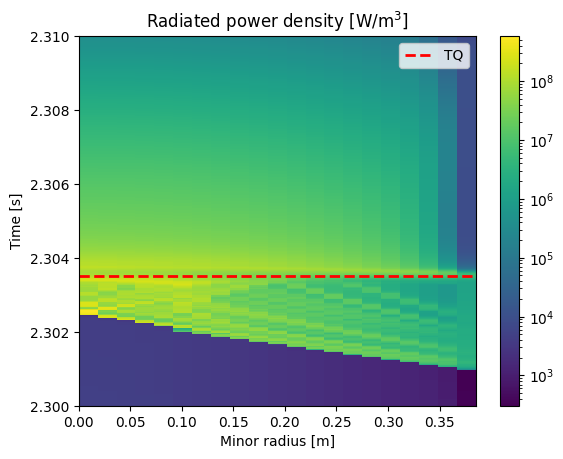

In [34]:
plt.pcolormesh(radius, time+2.3, Prad[:, :], norm="log")
plt.xlabel("Minor radius [m]")
plt.ylabel("Time [s]")
plt.axhline(2.3035, ls="--", lw=2, c="red", label="TQ")
plt.legend()
plt.colorbar()
plt.title(r"Radiated power density [W/m$^3$]")
plt.show()